<a href="https://www.kaggle.com/code/souravhada/email-spam-classification-notebook?scriptVersionId=167023755" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Installing UCI Machine Learning Repository

In [1]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


## Importing neccesary packages

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

## Importing and Pre-processing the Data


In [3]:
# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets
np.ravel(y)

array([1, 1, 1, ..., 0, 0, 0])

In [4]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
#train-test Split 
# Using np.ravel() to ensure that y_train and y_test is a 1D array, which matches the expected shape for the target array in scikit-learn models.
X_train,X_test, y_train, y_test = train_test_split(X,np.ravel(y), test_size=0.2, random_state=42)

In [6]:
#Standardisation 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model Training and Evaluation

## Logisitc Regression

In [7]:
# Initialisng and trianing Logistic Regression Model
logistic_reg = LogisticRegression() 
logistic_reg.fit(X_train_scaled,(y_train)) 

# Making predictions on the test data and calculating accuracy of the model
logistic_reg_pred = logistic_reg.predict(X_test_scaled) 
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)

# Printing accuracy and classification report for Logistic Regression 
print("The Accuracy Achieved using Logistic Regression is:", logistic_reg_accuracy*100,"%",)
print(classification_report(y_test,logistic_reg_pred))

The Accuracy Achieved using Logistic Regression is: 91.31378935939196 %
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       531
           1       0.94      0.85      0.89       390

    accuracy                           0.91       921
   macro avg       0.92      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921



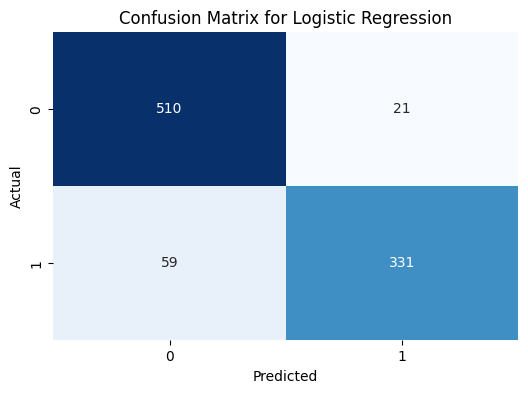

In [8]:
# Confusion matrix 
logistic_reg_cm = confusion_matrix(y_test, logistic_reg_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(logistic_reg_cm, annot= True, fmt='d', cmap='Blues', cbar=False, )
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Naive Bayes

In [9]:
# Initialising and training Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

# Making predictions on the test data and calcuating accuracy of the model
naive_bayes_pred = naive_bayes.predict(X_test_scaled)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)

# Printing accuracy and classification report for Naive Bayes
print("Accuracy of Naive Bayes Algorithm is",naive_bayes_accuracy*100,"%")
print(classification_report(y_test,naive_bayes_pred))

Accuracy of Naive Bayes Algorithm is 83.49619978284474 %
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       531
           1       0.74      0.93      0.83       390

    accuracy                           0.83       921
   macro avg       0.84      0.85      0.83       921
weighted avg       0.85      0.83      0.84       921



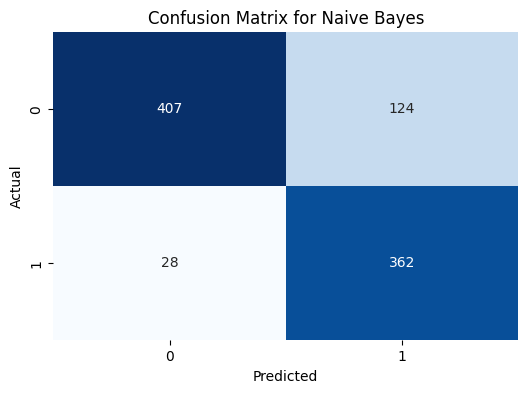

In [10]:
# confusion matrix
naive_bayes_cm = confusion_matrix(y_test, naive_bayes_pred)

# plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(naive_bayes_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## K-Nearest Neighbors

In [11]:
# Initlasing and training the K-Nearest Neigbors classification with k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

# Making predictions on the test data and calculating the accuracy score
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Accuracy for K-Nearest Neighbors Algorithm is:", knn_accuracy*100,"%")
print(classification_report(y_test,knn_pred))

Accuracy for K-Nearest Neighbors Algorithm is: 88.70792616720955 %
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       531
           1       0.94      0.78      0.85       390

    accuracy                           0.89       921
   macro avg       0.90      0.87      0.88       921
weighted avg       0.89      0.89      0.89       921



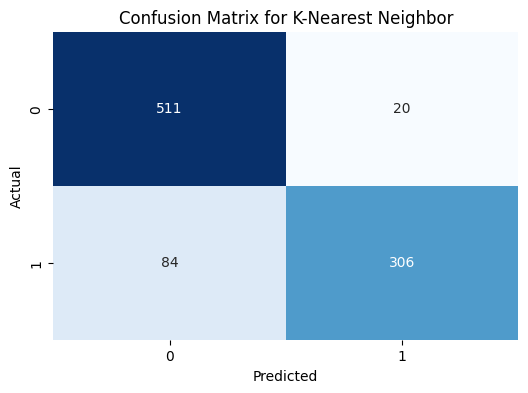

In [12]:

knn_cm = confusion_matrix(y_test,knn_pred)

plt.figure(figsize=(6,4))
sns.heatmap(knn_cm, annot=True, fmt='d',cmap="Blues",cbar=False)
plt.title("Confusion Matrix for K-Nearest Neighbor")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Support Vector Machine

In [13]:
svm = SVC()
svm.fit(X_train_scaled,y_train)

svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test,svm_pred)

print("Accuracy for Support Vector Machine algorithm is:", svm_accuracy, "%")
print(classification_report(y_test, svm_pred))

Accuracy for Support Vector Machine algorithm is: 0.9315960912052117 %
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.88      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



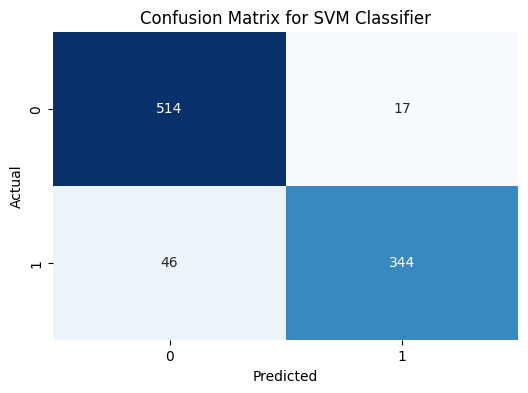

In [14]:

svm_cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(6,4))
sns.heatmap(svm_cm, annot=True, fmt='d',cmap='Blues',cbar=False)
plt.title("Confusion Matrix for SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree Classifier

In [15]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

decision_tree_pred = decision_tree.predict(X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

print("Accuracy Score for Decision Tree is: ",decision_tree_accuracy*100,"%")
print(classification_report(y_test, decision_tree_pred))

Accuracy Score for Decision Tree is:  69.05537459283387 %
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       531
           1       0.64      0.62      0.63       390

    accuracy                           0.69       921
   macro avg       0.68      0.68      0.68       921
weighted avg       0.69      0.69      0.69       921



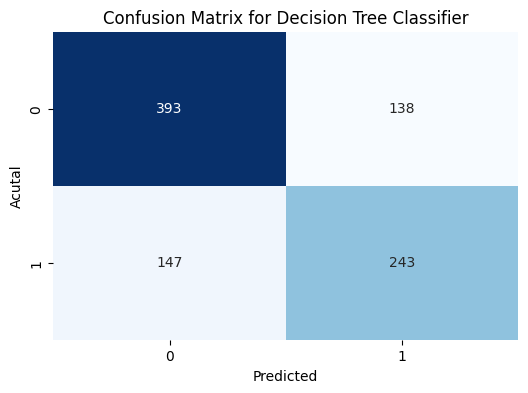

In [16]:

decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)

plt.figure(figsize=(6,4))
sns.heatmap(decision_tree_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Acutal")
plt.show()

## Random Forest Classifier

In [17]:
random_forest =  RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

random_forest_pred = random_forest.predict(X_test_scaled)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

print("Accuracy score for Random Forest Classifier is: ", random_forest_accuracy*100,"%")
print(classification_report(y_test, random_forest_pred))

Accuracy score for Random Forest Classifier is:  92.61672095548317 %
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       531
           1       0.98      0.84      0.91       390

    accuracy                           0.93       921
   macro avg       0.94      0.91      0.92       921
weighted avg       0.93      0.93      0.93       921



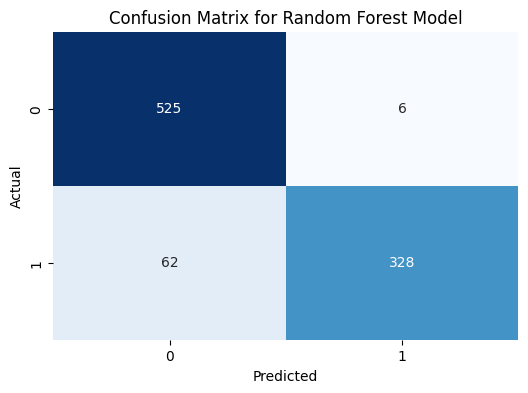

In [18]:

random_forest_cm = confusion_matrix(y_test, random_forest_pred)

plt.figure(figsize=(6,4))
sns.heatmap(random_forest_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.show()

## Comparison of accuracy for different models 

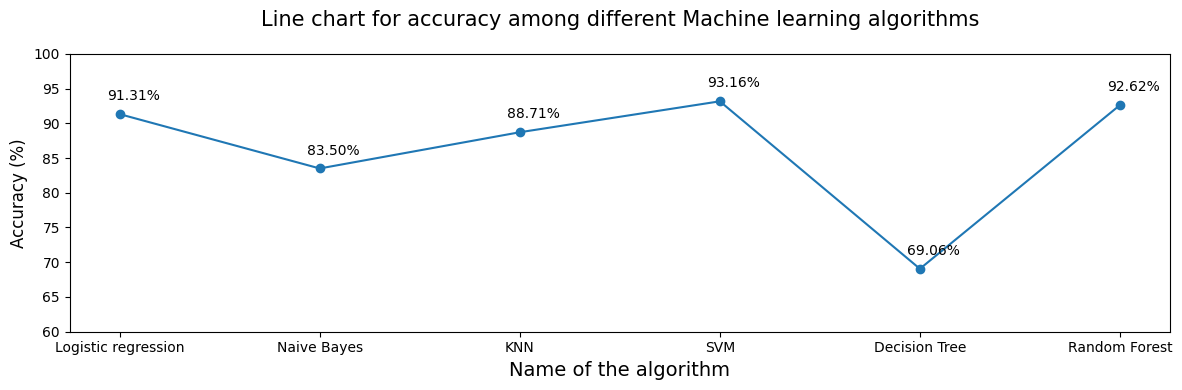

In [19]:
model_names = ["Logistic regression", "Naive Bayes", "KNN", "SVM", "Decision Tree", "Random Forest"]
accuracy_scores = [logistic_reg_accuracy, naive_bayes_accuracy, knn_accuracy, svm_accuracy, decision_tree_accuracy, random_forest_accuracy]
accuracy_scores = [ scores * 100 for scores in accuracy_scores]
plt.figure(figsize=(12,4))
plt.plot(model_names, accuracy_scores, marker='o',linestyle ='-',)
plt.title("Line chart for accuracy among different Machine learning algorithms",pad=20, fontsize =15)
plt.xlabel("Name of the algorithm",fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(60,100)

for x, y in zip(model_names, accuracy_scores):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(10,10), ha='center')
plt.tight_layout() 
plt.show()


## Comparison of False Positive rates for different algorithms

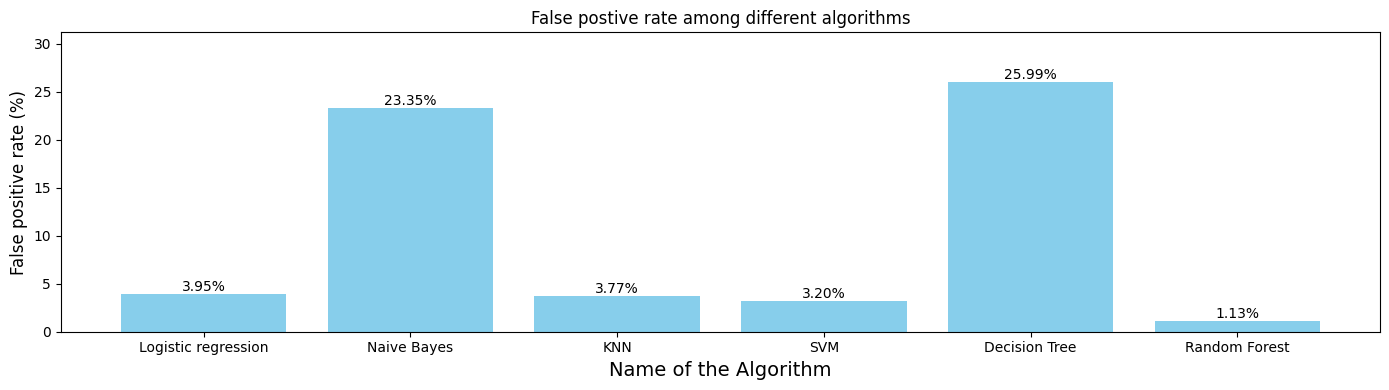

In [20]:
confusion_matrices = [logistic_reg_cm, naive_bayes_cm, knn_cm, svm_cm, decision_tree_cm, random_forest_cm]
false_positive_rate = []
for cm in confusion_matrices:
    tn, fp, fn, tp = cm.ravel()
    fpr = (fp/(tn+fp))*100
    false_positive_rate.append(fpr)

false_positive_rate

plt.figure(figsize=(14,4))
plt.bar(model_names, false_positive_rate, color='skyblue')
plt.title("False postive rate among different algorithms")
plt.xlabel("Name of the Algorithm", fontsize=14)
plt.ylabel("False positive rate (%)", fontsize=12)
plt.ylim(0,max(false_positive_rate)*1.2)

for x, y in zip(model_names, false_positive_rate):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()